# InSAR - Remove Phase Ramp - FFT Approach

## Estimate and Remove a Linear Phase Ramp from Differential Interferograms.

In [15]:
# - python dependencies
import numpy as np
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline
# - program dependencies
from utils.mpl_utils import add_colorbar
from remove_phase_ramp_fft import estimate_phase_ramp

## Import sample differential Interferogram

In [16]:
# - Absolute Path to input interferogram
path_to_intf = './data/diff_ingram_test.tiff'

# - Import interferometric phase using rasterio
with rasterio.open(path_to_intf, mode="r+") as dataset_c:
    # - Read Input Raster and Binary Mask
    intf_phase = np.array(dataset_c.read(1),
                              dtype=dataset_c.dtypes[0])
    # - Define Valid data mask
    raster_mask = np.array(dataset_c.read_masks(1),
                           dtype=dataset_c.dtypes[0])
    raster_mask[raster_mask == 255] = 1.
    raster_mask[raster_mask == 0] = np.nan

# - Transform the Input Phase Field into a complex array
dd_phase_complex = np.exp(1j * intf_phase).astype(np.complex64)

# - Generate synthetic field domain
array_dim = dd_phase_complex.shape
n_rows = array_dim[0]
n_columns = array_dim[1]

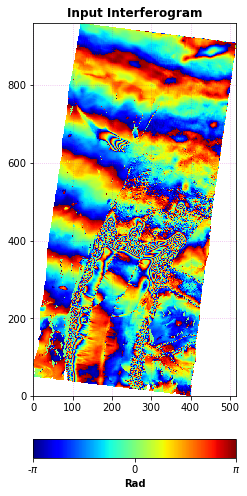

In [17]:
fig_1 = plt.figure(figsize=(8, 8))
ax_1 = fig_1.add_subplot(121)
ax_1.set_title('Input Interferogram', weight='bold')
im_1 = ax_1.pcolormesh(intf_phase * raster_mask,
                       vmin=-np.pi, vmax=np.pi,
                       cmap=plt.cm.get_cmap('jet'))
cb_1 = add_colorbar(fig_1, ax_1, im_1)
cb_1.set_label(label='Rad', weight='bold')
cb_1.ax.set_xticks([-np.pi, 0, np.pi])
cb_1.ax.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
ax_1.grid(color='m', linestyle='dotted', alpha=0.3)
plt.show()

## Estimate Phase Ramp in the Frequency Domain

In [18]:
# - Zero Padding Parameters
row_pad = 0
col_pad = 0
# - Estimate Phase Ramp in the Frequency domain
rmp = estimate_phase_ramp(dd_phase_complex,
                          row_pad=row_pad, col_pad=col_pad)
phase_ramp = rmp['phase_ramp']
# - Extract wrapped phase
ingram_ramp = np.angle(phase_ramp)

In [19]:
# - Remove the estimated phase ramp from the input phase field by
# - computing the complex conjugate product between the input phase
# - field and the estimated ramp.
dd_phase_complex_corrected = np.angle(dd_phase_complex
                                      * np.conjugate(phase_ramp))

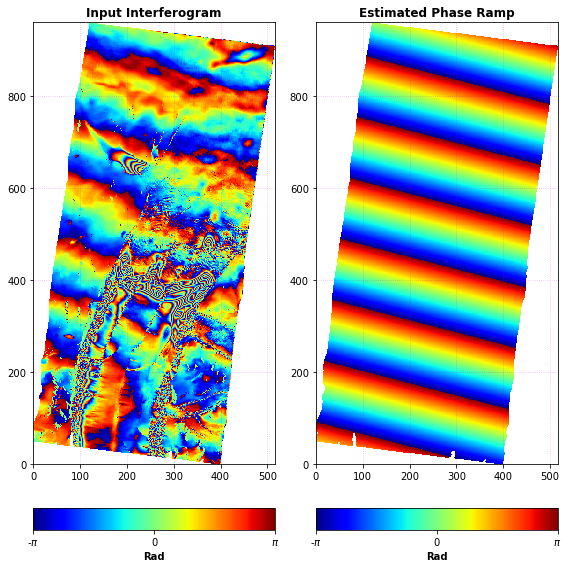

In [20]:
fig_1 = plt.figure(figsize=(8, 8))
ax_1 = fig_1.add_subplot(121)
ax_1.set_title('Input Interferogram', weight='bold')
im_1 = ax_1.pcolormesh(intf_phase * raster_mask,
                       vmin=-np.pi, vmax=np.pi,
                       cmap=plt.cm.get_cmap('jet'))
cb_1 = add_colorbar(fig_1, ax_1, im_1)
cb_1.set_label(label='Rad', weight='bold')
cb_1.ax.set_xticks([-np.pi, 0, np.pi])
cb_1.ax.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
ax_1.grid(color='m', linestyle='dotted', alpha=0.3)

ax_2 = fig_1.add_subplot(122)
ax_2.set_title('Estimated Phase Ramp', weight='bold')
im_2 = ax_2.pcolormesh(ingram_ramp * raster_mask,
                       cmap=plt.cm.get_cmap('jet'))
cb_2 = add_colorbar(fig_1, ax_2, im_2)
cb_2.set_label(label='Rad', weight='bold')
cb_2.ax.set_xticks([-np.pi, 0, np.pi])
cb_2.ax.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
ax_2.grid(color='m', linestyle='dotted', alpha=0.3)
plt.tight_layout()
# -
plt.show()
plt.close()

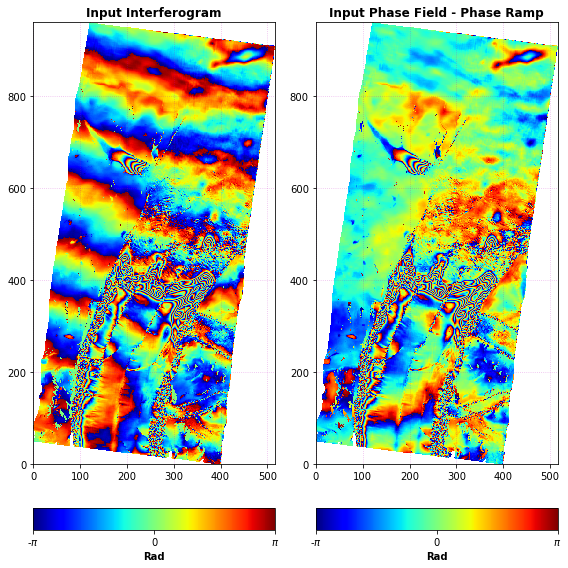

In [21]:
# - Compare Input with corrected Interferogram
fig_3 = plt.figure(figsize=(8, 8))
ax_3 = fig_3.add_subplot(121)
ax_3.set_title('Input Interferogram', weight='bold')
im_3a = ax_3.pcolormesh(intf_phase * raster_mask,
                        vmin=-np.pi, vmax=np.pi,
                        cmap=plt.cm.get_cmap('jet'))
cb_3a = add_colorbar(fig_3, ax_3, im_3a)
cb_3a.set_label(label='Rad', weight='bold')
cb_3a.ax.set_xticks([-np.pi, 0, np.pi])
cb_3a.ax.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
ax_3.grid(color='m', linestyle='dotted', alpha=0.3)

ax_3 = fig_3.add_subplot(122)
ax_3.set_title('Input Phase Field - Phase Ramp', weight='bold')
im_3b = ax_3.pcolormesh(dd_phase_complex_corrected * raster_mask,
                        cmap=plt.cm.get_cmap('jet'))
cb_3b = add_colorbar(fig_3, ax_3, im_3b)
cb_3b.set_label(label='Rad', weight='bold')
cb_3b.ax.set_xticks([-np.pi, 0, np.pi])
cb_3b.ax.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
ax_3.grid(color='m', linestyle='dotted', alpha=0.3)
plt.tight_layout()
# -
plt.show()
plt.close()